In [1]:
import os
import copy
import config
import dota2api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB

%matplotlib inline

In [2]:
API_KEY = config.STEAM_API_KEY
api = dota2api.Initialise(API_KEY)

In [3]:
data = pd.read_csv('../data/draft/capmodedata.csv')

In [4]:
data.head(5)

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,17hero_id,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id
0,1928898739,True,2885,False,0,73,False,1,69,False,...,41.0,False,0.0,81.0,True,1.0,105.0,True,0.0,94.0
1,1928932285,True,1894,False,0,69,False,1,102,False,...,40.0,False,0.0,28.0,True,1.0,97.0,True,0.0,62.0
2,1928903165,True,2424,False,1,85,False,0,68,False,...,30.0,False,1.0,47.0,True,0.0,58.0,True,1.0,33.0
3,1928907204,True,2588,False,1,71,False,0,73,False,...,30.0,False,1.0,68.0,True,0.0,50.0,True,1.0,21.0
4,1928865084,True,3658,False,1,12,False,0,42,False,...,93.0,False,1.0,67.0,True,0.0,72.0,True,1.0,40.0


In [5]:
data.columns

Index(['match_id', 'radiant_win', 'duration', '1is_pick', '1team_id',
       '1hero_id', '2is_pick', '2team_id', '2hero_id', '3is_pick', '3team_id',
       '3hero_id', '4is_pick', '4team_id', '4hero_id', '5is_pick', '5team_id',
       '5hero_id', '6is_pick', '6team_id', '6hero_id', '7is_pick', '7team_id',
       '7hero_id', '8is_pick', '8team_id', '8hero_id', '9is_pick', '9team_id',
       '9hero_id', '10is_pick', '10team_id', '10hero_id', '11is_pick',
       '11team_id', '11hero_id', '12is_pick', '12team_id', '12hero_id',
       '13is_pick', '13team_id', '13hero_id', '14is_pick', '14team_id',
       '14hero_id', '15is_pick', '15team_id', '15hero_id', '16is_pick',
       '16team_id', '16hero_id', '17is_pick', '17team_id', '17hero_id',
       '18is_pick', '18team_id', '18hero_id', '19is_pick', '19team_id',
       '19hero_id', '20is_pick', '20team_id', '20hero_id'],
      dtype='object')

In [6]:
# # # Getting Heroes ID according to the name
heroes = api.get_heroes()

In [7]:
heroes_dict = {}
for i in range (len(heroes['heroes'])):
    hero_id = heroes['heroes'][i]['id']
    hero_name = heroes['heroes'][i]['localized_name']
    heroes_dict[hero_id]= hero_name

In [8]:
def change_hero_name(row):
    if row in heroes_dict:
        return heroes_dict[row]
    
columns = [
    '1hero_id', 
    '2hero_id', 
    '3hero_id', 
    '4hero_id', 
    '5hero_id', 
    '6hero_id', 
    '7hero_id', 
    '8hero_id', 
    '9hero_id',
    '10hero_id',
    '11hero_id', 
    '12hero_id', 
    '13hero_id', 
    '14hero_id', 
    '15hero_id', 
    '16hero_id', 
    '17hero_id', 
    '18hero_id', 
    '19hero_id',
    '20hero_id'
    ]
    
for i in range(len(columns)):
    data[columns[i]] = data[columns[i]].apply(change_hero_name)

In [9]:
data.head(5)

,match_id,radiant_win,duration,1is_pick,1team_id,1hero_id,2is_pick,2team_id,2hero_id,3is_pick,...,17hero_id,18is_pick,18team_id,18hero_id,19is_pick,19team_id,19hero_id,20is_pick,20team_id,20hero_id
0,1928898739,True,2885,False,0,Alchemist,False,1,Doom,False,...,Faceless Void,False,0.0,Chaos Knight,True,1.0,Techies,True,0.0,Medusa
1,1928932285,True,1894,False,0,Doom,False,1,Abaddon,False,...,Venomancer,False,0.0,Slardar,True,1.0,Magnus,True,0.0,Bounty Hunter
2,1928903165,True,2424,False,1,Undying,False,0,Ancient Apparition,False,...,Witch Doctor,False,1.0,Viper,True,0.0,Enchantress,True,1.0,Enigma
3,1928907204,True,2588,False,1,Spirit Breaker,False,0,Alchemist,False,...,Witch Doctor,False,1.0,Ancient Apparition,True,0.0,Dazzle,True,1.0,Windranger
4,1928865084,True,3658,False,1,Phantom Lancer,False,0,Wraith King,False,...,Slark,False,1.0,Spectre,True,0.0,Gyrocopter,True,1.0,Venomancer


In [10]:
np.max(data['duration'])
max_hours = (np.max(data['duration'])) / 60
max_hours

161.26666666666668

In [11]:
def convert_to_minutes(row):
    return row / 60

data['minutes'] = data['duration'].apply(convert_to_minutes)

In [12]:
groupby_minute = data.groupby(['minutes']).count()

In [13]:
# groupby_minute.head()

In [14]:
len(groupby_minute)

5184

In [15]:
groupby_minute.index

Float64Index([0.03333333333333333, 0.26666666666666666, 0.36666666666666664,
               0.5166666666666667,                0.55,  0.5833333333333334,
               0.6333333333333333,                0.65,                 0.8,
               0.8166666666666667,
              ...
               127.83333333333333,              129.05,              136.35,
                           138.05,              138.35,  140.86666666666667,
               142.46666666666667,               143.2,               153.3,
               161.26666666666668],
             dtype='float64', name='minutes', length=5184)

In [16]:
max(groupby_minute.index)

161.26666666666668

(array([819., 967., 968., 967., 949., 444.,  50.,  11.,   7.,   2.]),
 array([3.33333333e-02, 1.61566667e+01, 3.22800000e+01, 4.84033333e+01,
        6.45266667e+01, 8.06500000e+01, 9.67733333e+01, 1.12896667e+02,
        1.29020000e+02, 1.45143333e+02, 1.61266667e+02]),
 <a list of 10 Patch objects>)

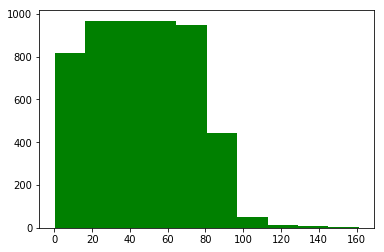

In [17]:
plt.hist(groupby_minute.index, histtype='bar', color='green')

In [18]:
# # As there should be no bias, lets see which side of the map has the most win or is it equal

In [19]:
base1 = data.loc[data['radiant_win'] == True]

In [20]:
len(base1)

233537

In [21]:
base2 = data.loc[data['radiant_win'] == False]

In [22]:
len(base2)

227513

In [23]:
total = len(base1) + len(base2)

In [24]:
total

461050

In [25]:
len(data)

461050

In [26]:
temp_a = ['radiant', 'dire']
temp_b = [len(base1), len(base2)]

<BarContainer object of 2 artists>

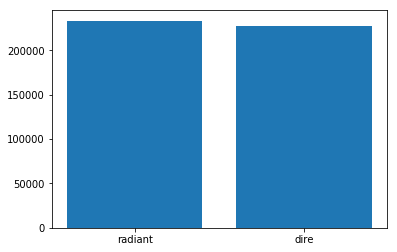

In [27]:
plt.bar(temp_a, temp_b)

# # Let's Analyze the Draft
# # As each draft must have it's own machine learning and send the data to the next machine learning model

# # Getting the first ban heroes

In [30]:
pick_1 = data['1hero_id']

In [42]:
pick1_count = data.groupby(data['1hero_id']).size()

In [46]:
pick1_count.head(3)

1hero_id
Abaddon                 494
Alchemist             16286
Ancient Apparition     2085
dtype: int64

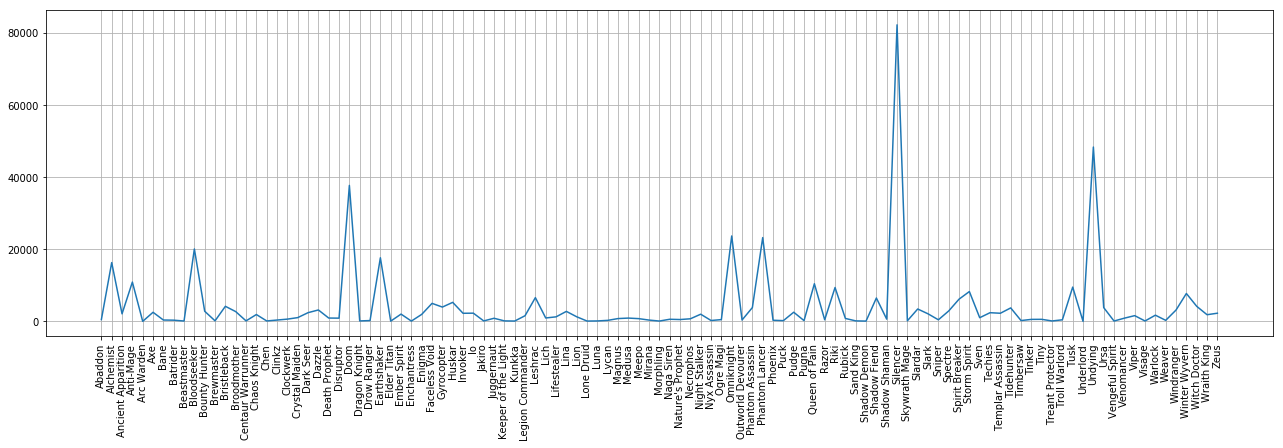

In [174]:
plt.rcParams['figure.figsize'] = 22, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(pick1_count.index, pick1_count.values)

### Getting the second ban heroes

In [58]:
pick2_count = data.groupby(data['2hero_id']).size()

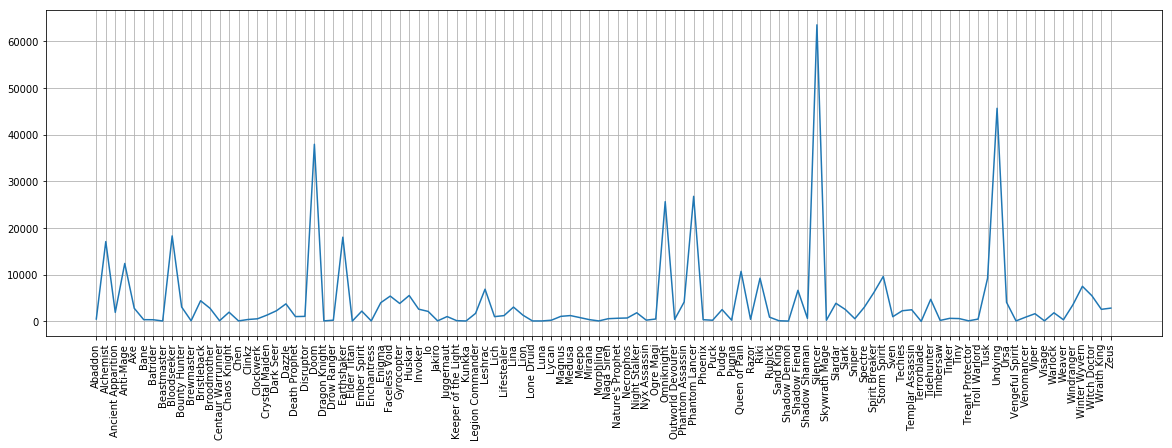

In [56]:
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(pick2_count.index, pick2_count.values)

### Getting the third ban heroes

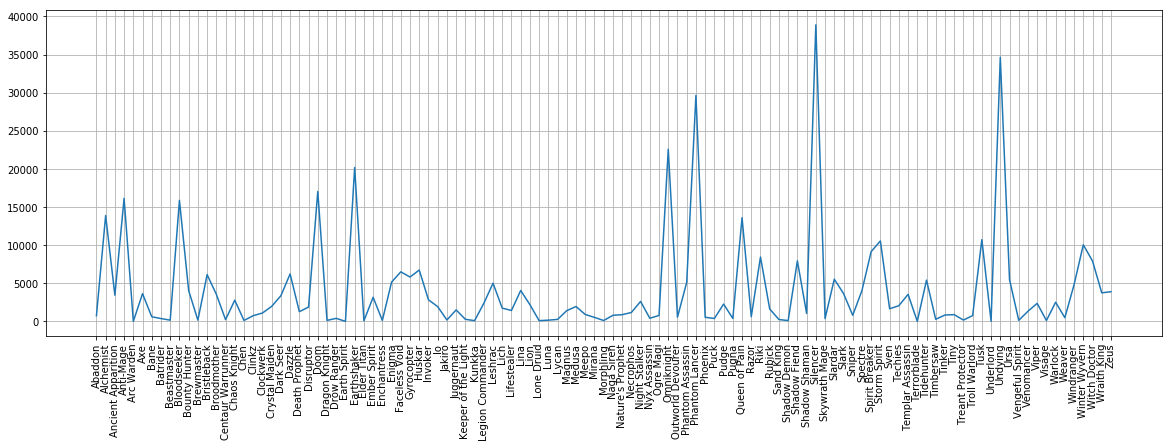

In [59]:
pick3_count = data.groupby(data['3hero_id']).size()
plt.rcParams['figure.figsize'] = 20, 6
plt.xticks(rotation='vertical')
plt.grid()
plt.plot(pick3_count.index, pick3_count.values)

### Getting the total ban from 1, 2, 3, 4, 9, 10, 11, 12, 17, 18
#### Total Bans = 10

In [122]:
print(len(pick1_count))
print(len(pick2_count))
print(len(pick3_count))
print(len(all_data['3hero_id']))
# print(len(pick4_count))
# print(len(pick9_count))


109
108
111
116


In [124]:
heroes_list = []
for i, j in enumerate(heroes_dict):
    hero_name = heroes_dict[j]
    heroes_list.append(hero_name)

In [126]:
total_ban = 10
columns = ['1hero_id', '2hero_id', '3hero_id', '4hero_id', '9hero_id', '10hero_id', '11hero_id', '12hero_id', '17hero_id', '18hero_id']
all_data = pd.DataFrame(columns=columns, index=heroes_list)

In [127]:
all_data.sort_index()

,1hero_id,2hero_id,3hero_id,4hero_id,9hero_id,10hero_id,11hero_id,12hero_id,17hero_id,18hero_id
Abaddon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alchemist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ancient Apparition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Anti-Mage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arc Warden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Batrider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Beastmaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bloodseeker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:


for i in range(total_ban):
    all_data[columns[i]] = data.groupby(data[columns[i]]).size()

# pick4_count = data.groupby(data['4hero_id']).size()
# pick9_count = data.groupby(data['9hero_id']).size()

In [129]:
all_data

,1hero_id,2hero_id,3hero_id,4hero_id,9hero_id,10hero_id,11hero_id,12hero_id,17hero_id,18hero_id
Anti-Mage,10887.0,12392.0,16132.0,16880.0,28283.0,27217.0,25382.0,24606.0,18704.0,18923.0
Axe,2514.0,2809.0,3633.0,3745.0,9055.0,8164.0,6385.0,6429.0,5153.0,4957.0
Bane,369.0,361.0,602.0,596.0,752.0,807.0,755.0,751.0,993.0,924.0
Bloodseeker,20065.0,18299.0,15876.0,15072.0,14602.0,12813.0,11326.0,10766.0,7805.0,7472.0
Crystal Maiden,1033.0,1342.0,1965.0,2241.0,2643.0,2644.0,2702.0,2653.0,3519.0,3228.0
Drow Ranger,219.0,251.0,391.0,441.0,1571.0,1540.0,1343.0,1371.0,2249.0,2495.0
Earthshaker,17621.0,18024.0,20185.0,19430.0,12875.0,11931.0,9991.0,9342.0,6693.0,6487.0
Juggernaut,855.0,1028.0,1500.0,1744.0,4520.0,4700.0,5674.0,6254.0,7671.0,7803.0
Mirana,354.0,369.0,520.0,488.0,1141.0,1169.0,1065.0,1046.0,1319.0,1368.0
Shadow Fiend,6470.0,6652.0,7938.0,8425.0,11640.0,11353.0,11989.0,11927.0,16700.0,17998.0


In [130]:
# # Filling the Nan Values with 0
all_data.shape

(116, 10)

In [132]:
# # For this context, null value is the 0 value (i.e hero is not picked on it's respective phase)
all_data.fillna(value=0)

,1hero_id,2hero_id,3hero_id,4hero_id,9hero_id,10hero_id,11hero_id,12hero_id,17hero_id,18hero_id
Anti-Mage,10887.0,12392.0,16132.0,16880.0,28283.0,27217.0,25382.0,24606.0,18704.0,18923.0
Axe,2514.0,2809.0,3633.0,3745.0,9055.0,8164.0,6385.0,6429.0,5153.0,4957.0
Bane,369.0,361.0,602.0,596.0,752.0,807.0,755.0,751.0,993.0,924.0
Bloodseeker,20065.0,18299.0,15876.0,15072.0,14602.0,12813.0,11326.0,10766.0,7805.0,7472.0
Crystal Maiden,1033.0,1342.0,1965.0,2241.0,2643.0,2644.0,2702.0,2653.0,3519.0,3228.0
Drow Ranger,219.0,251.0,391.0,441.0,1571.0,1540.0,1343.0,1371.0,2249.0,2495.0
Earthshaker,17621.0,18024.0,20185.0,19430.0,12875.0,11931.0,9991.0,9342.0,6693.0,6487.0
Juggernaut,855.0,1028.0,1500.0,1744.0,4520.0,4700.0,5674.0,6254.0,7671.0,7803.0
Mirana,354.0,369.0,520.0,488.0,1141.0,1169.0,1065.0,1046.0,1319.0,1368.0
Shadow Fiend,6470.0,6652.0,7938.0,8425.0,11640.0,11353.0,11989.0,11927.0,16700.0,17998.0


In [144]:
sum_all_data = all_data.sum(axis=1)

In [146]:
len(sum_all_data.index)
type(sum_all_data)

pandas.core.series.Series

In [173]:
sum_all_data

Anti-Mage              199406.0
Axe                     52844.0
Bane                     6910.0
Bloodseeker            134096.0
Crystal Maiden          23970.0
Drow Ranger             11871.0
Earthshaker            132579.0
Juggernaut              41749.0
Mirana                   8839.0
Shadow Fiend           111092.0
Morphling                1401.0
Phantom Lancer         244466.0
Puck                     9647.0
Pudge                   22237.0
Razor                   14361.0
Sand King                5403.0
Storm Spirit           108197.0
Sven                    42068.0
Tiny                    17019.0
Vengeful Spirit          3786.0
Windranger              57866.0
Zeus                    54209.0
Kunkka                   2468.0
Lina                    49600.0
Lich                    23307.0
Lion                    31229.0
Shadow Shaman           13323.0
Slardar                 55222.0
Tidehunter              68210.0
Witch Doctor            71820.0
                         ...   
Nyx Assa

In [147]:
sum_all_data.index

Index(['Anti-Mage', 'Axe', 'Bane', 'Bloodseeker', 'Crystal Maiden',
       'Drow Ranger', 'Earthshaker', 'Juggernaut', 'Mirana', 'Shadow Fiend',
       ...
       'Phoenix', 'Oracle', 'Techies', 'Winter Wyvern', 'Arc Warden',
       'Underlord', 'Monkey King', 'Pangolier', 'Dark Willow', 'Grimstroke'],
      dtype='object', length=116)

In [172]:
sum_all_data.values


array([1.99406e+05, 5.28440e+04, 6.91000e+03, 1.34096e+05, 2.39700e+04,
       1.18710e+04, 1.32579e+05, 4.17490e+04, 8.83900e+03, 1.11092e+05,
       1.40100e+03, 2.44466e+05, 9.64700e+03, 2.22370e+04, 1.43610e+04,
       5.40300e+03, 1.08197e+05, 4.20680e+04, 1.70190e+04, 3.78600e+03,
       5.78660e+04, 5.42090e+04, 2.46800e+03, 4.96000e+04, 2.33070e+04,
       3.12290e+04, 1.33230e+04, 5.52220e+04, 6.82100e+04, 7.18200e+04,
       7.18470e+04, 5.45530e+04, 8.78600e+03, 1.59760e+04, 1.42690e+04,
       2.53590e+04, 2.21300e+03, 1.56341e+05, 1.46890e+04, 1.06506e+05,
       5.71670e+04, 1.83010e+04, 8.54860e+04, 5.82300e+03, 6.12700e+04,
       4.43170e+04, 7.33700e+03, 3.42400e+03, 6.06590e+04, 2.63840e+04,
       4.05560e+04, 9.35700e+03, 2.08680e+04, 4.60640e+04, 1.38960e+04,
       1.25358e+05, 1.11900e+03, 6.92220e+04, 1.96630e+04, 3.33660e+04,
       3.67590e+04, 8.57800e+03, 3.24800e+03, 3.49000e+03, 9.94000e+02,
       7.08590e+04, 1.34765e+05, 3.61260e+04, 6.29360e+04, 7.524

In [150]:
# # Plotting all the ban values

In [170]:
# # Total games
print(len(data))
y_ticks = np.arange(0, 350000, 50000)

461050


([<matplotlib.axis.YTick at 0x7f7e754f6c50>,
 <a list of 7 Text yticklabel objects>)

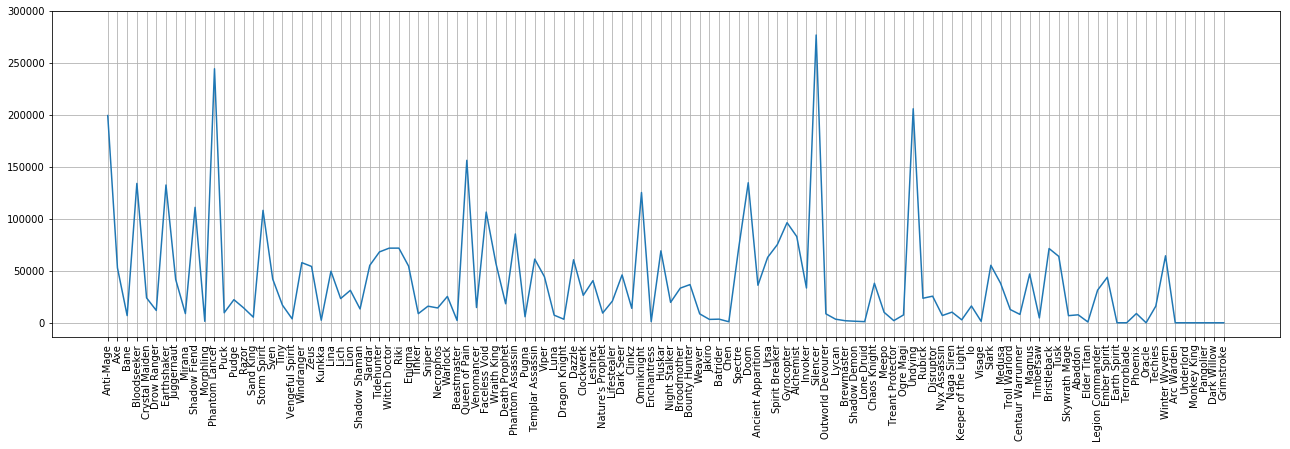

In [177]:
plt.grid()
plt.plot(sum_all_data.index, sum_all_data.values)
plt.xticks(rotation='vertical')
plt.yticks(y_ticks)

### Getting graph for the most pick

In [178]:
total_pick = 10
columns = ['5hero_id', '6hero_id', '7hero_id', '8hero_id', '13hero_id', '14hero_id', '15hero_id', '16hero_id', '19hero_id', '20hero_id']
pick_all_data = pd.DataFrame(columns=columns, index=heroes_list)

In [183]:
pick_all_data.head(5)

,5hero_id,6hero_id,7hero_id,8hero_id,13hero_id,14hero_id,15hero_id,16hero_id,19hero_id,20hero_id
Anti-Mage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Axe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bloodseeker,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Crystal Maiden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
for i in range(total_pick):
    pick_all_data[columns[i]] = data.groupby(data[columns[i]]).size()

In [188]:
pick_all_data.head(-5)

,5hero_id,6hero_id,7hero_id,8hero_id,13hero_id,14hero_id,15hero_id,16hero_id,19hero_id,20hero_id
Anti-Mage,1473.0,1848.0,2392.0,4153.0,7617.0,7601.0,10191.0,10878.0,8406.0,7696.0
Axe,2190.0,4781.0,5925.0,8543.0,9151.0,9182.0,6280.0,6383.0,4186.0,4300.0
Bane,2753.0,3267.0,3127.0,3087.0,1762.0,2188.0,1598.0,1557.0,1046.0,1177.0
Bloodseeker,3059.0,3238.0,3548.0,3781.0,5002.0,5159.0,5035.0,5079.0,3662.0,3765.0
Crystal Maiden,23045.0,19252.0,16526.0,12551.0,6020.0,5344.0,4148.0,3672.0,2516.0,2449.0
Drow Ranger,643.0,778.0,1266.0,1166.0,2437.0,2606.0,4318.0,4013.0,5552.0,5105.0
Earthshaker,48622.0,42908.0,27645.0,25206.0,11511.0,10859.0,6555.0,6459.0,3515.0,3744.0
Juggernaut,1513.0,1569.0,2802.0,2496.0,6426.0,6529.0,9972.0,9238.0,9286.0,8704.0
Mirana,1732.0,1758.0,2654.0,2370.0,2375.0,2216.0,2256.0,2155.0,2592.0,2480.0
Shadow Fiend,7807.0,7563.0,7064.0,5652.0,9155.0,7577.0,10826.0,9229.0,13617.0,11593.0


In [189]:
# # As in our context, we fill Null values with 0 (i.e, not picked = 0)
pick_all_data.fillna(0)

,5hero_id,6hero_id,7hero_id,8hero_id,13hero_id,14hero_id,15hero_id,16hero_id,19hero_id,20hero_id
Anti-Mage,1473.0,1848.0,2392.0,4153.0,7617.0,7601.0,10191.0,10878.0,8406.0,7696.0
Axe,2190.0,4781.0,5925.0,8543.0,9151.0,9182.0,6280.0,6383.0,4186.0,4300.0
Bane,2753.0,3267.0,3127.0,3087.0,1762.0,2188.0,1598.0,1557.0,1046.0,1177.0
Bloodseeker,3059.0,3238.0,3548.0,3781.0,5002.0,5159.0,5035.0,5079.0,3662.0,3765.0
Crystal Maiden,23045.0,19252.0,16526.0,12551.0,6020.0,5344.0,4148.0,3672.0,2516.0,2449.0
Drow Ranger,643.0,778.0,1266.0,1166.0,2437.0,2606.0,4318.0,4013.0,5552.0,5105.0
Earthshaker,48622.0,42908.0,27645.0,25206.0,11511.0,10859.0,6555.0,6459.0,3515.0,3744.0
Juggernaut,1513.0,1569.0,2802.0,2496.0,6426.0,6529.0,9972.0,9238.0,9286.0,8704.0
Mirana,1732.0,1758.0,2654.0,2370.0,2375.0,2216.0,2256.0,2155.0,2592.0,2480.0
Shadow Fiend,7807.0,7563.0,7064.0,5652.0,9155.0,7577.0,10826.0,9229.0,13617.0,11593.0


In [191]:
sum_all_pick_data = pick_all_data.sum(axis=1)

In [198]:
sum_all_pick_data.head(2)

Anti-Mage    62255.0
Axe          60921.0
dtype: float64

([<matplotlib.axis.YTick at 0x7f7e7482ebe0>,
 <a list of 6 Text yticklabel objects>)

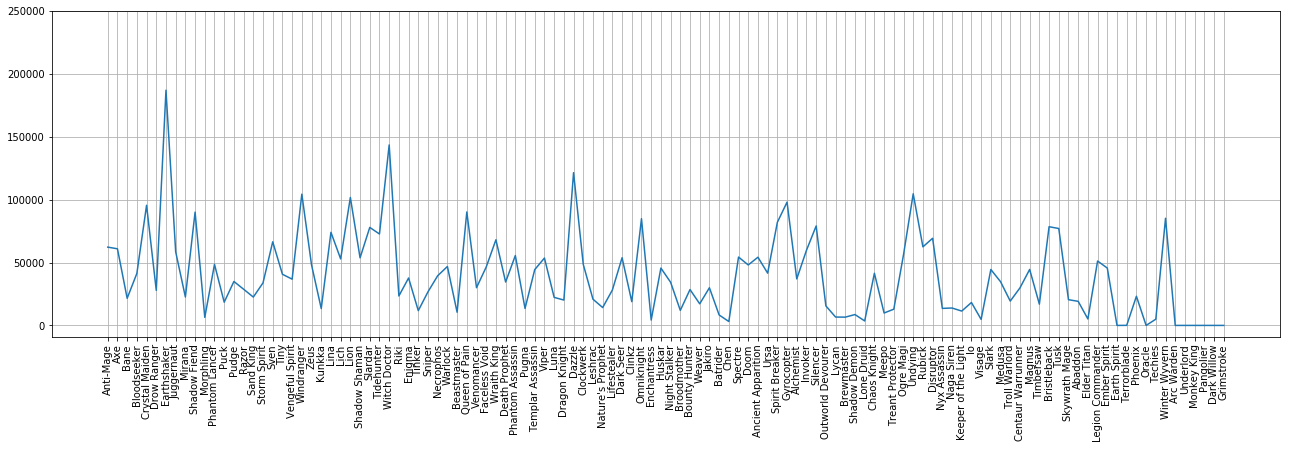

In [202]:
plt.grid()
plt.plot(sum_all_pick_data.index, sum_all_pick_data.values)
plt.xticks(rotation='vertical')
plt.yticks(np.arange(0, 300000, 50000))

### Machine Learning

In [ ]:
first_pick = data.loc[data['1is_pick'] == False]

In [ ]:
len(first_pick)

In [ ]:
first_picks = data.loc[data['1is_pick'] == True]

In [ ]:
len(first_picks)

In [ ]:
# # Checking the draft meta 
print(data.loc[0]['1is_pick'], data.loc[10]['1team_id'])
print(data.loc[0]['2is_pick'], data.loc[10]['2team_id'])
print(data.loc[0]['3is_pick'], data.loc[10]['3team_id'])
print(data.loc[0]['4is_pick'], data.loc[10]['4team_id'])
print(data.loc[0]['5is_pick'], data.loc[10]['5team_id'])
print(data.loc[0]['6is_pick'], data.loc[10]['6team_id'])
print(data.loc[0]['7is_pick'], data.loc[10]['7team_id'])
print(data.loc[0]['8is_pick'], data.loc[10]['8team_id'])
print(data.loc[0]['9is_pick'], data.loc[10]['9team_id'])
print(data.loc[0]['10is_pick'], data.loc[10]['10team_id'])
print(data.loc[0]['11is_pick'], data.loc[10]['11team_id'])
print(data.loc[0]['12is_pick'], data.loc[10]['12team_id'])
print(data.loc[0]['13is_pick'], data.loc[10]['13team_id'])
print(data.loc[0]['14is_pick'], data.loc[10]['14team_id'])
print(data.loc[0]['15is_pick'], data.loc[10]['15team_id'])
print(data.loc[0]['16is_pick'], data.loc[10]['16team_id'])
print(data.loc[0]['17is_pick'], data.loc[10]['17team_id'])
print(data.loc[0]['18is_pick'], data.loc[10]['18team_id'])
print(data.loc[0]['19is_pick'], data.loc[10]['19team_id'])
print(data.loc[0]['20is_pick'], data.loc[10]['20team_id'])

In [ ]:
# # Getting the ban for 1hero_id as 1is_pick is false
# # Let us supposr that 1st ban is from human, (it will be training data for us)

In [ ]:
X_main = data['1hero_id']
y_main = data['2hero_id']

In [ ]:
# # # Convert the string into label encoder
# encoder = LabelEncoder()

In [ ]:
# X = encoder.fit_transform(X_main)
# y = encoder.transform(y_main)

In [ ]:
X = np.array(X_main).reshape(-1, 1)
y = np.array(y_main).reshape(-1, 1)

In [14]:
model = LogisticRegression(n_jobs=4)

In [ ]:
model.fit(X, y)

In [ ]:
model.predict(np.array([17, 23, 34, 84, 65]).reshape(-1, 1))

In [ ]:
# # Getting the 4th ban now using 1, 2 and 3

In [5]:
hero_1 = data['1hero_id']
hero_2 = data['2hero_id']
hero_3 = data['3hero_id']
hero_4 = data['4hero_id']
hero_5 = data['5hero_id']
hero_6 = data['6hero_id']
hero_7 = data['7hero_id']
hero_8 = data['8hero_id']
hero_9 = data['9hero_id']

In [6]:
test1 = pd.DataFrame(columns=['1hero_id', '2hero_id', '3hero_id', '4hero_id', '5hero_id', '6hero_id', '7hero_id', '8hero_id', '9hero_id'])

In [7]:
test1['1hero_id'] = hero_1
test1['2hero_id'] = hero_2
test1['3hero_id'] = hero_3
test1['4hero_id'] = hero_4
test1['5hero_id'] = hero_5
test1['6hero_id'] = hero_6
test1['7hero_id'] = hero_7
test1['8hero_id'] = hero_8
test1['9hero_id'] = hero_9

In [8]:
test1.head(2)

,1hero_id,2hero_id,3hero_id,4hero_id,5hero_id,6hero_id,7hero_id,8hero_id,9hero_id
0,73,69,71,7,28,68.0,85.0,29.0,62.0
1,69,102,32,61,74,112.0,31.0,35.0,57.0


In [9]:
X = test1.as_matrix()
X

/home/sulabh/software/anaconda3/envs/dotaenv36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[ 73.,  69.,  71., ...,  85.,  29.,  62.],
       [ 69., 102.,  32., ...,  31.,  35.,  57.],
       [ 85.,  68.,  75., ...,  57.,   7.,   8.],
       ...,
       [ 44.,  29.,  12., ...,  98.,   4.,  41.],
       [  1.,  57.,  50., ...,   7.,  30.,   4.],
       [ 71., 100.,   7., ...,  26.,  99.,  93.]])

In [10]:
y = np.array(data['6hero_id'])

In [11]:
y

array([ 68., 112.,  50., ...,  18.,  28.,  11.])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# # Multinomial NB

In [31]:
# multinomialnb = MultinomialNB()

In [32]:
# multinomialnb.fit(X_train, y_train)

In [33]:
# g = multinomialnb.predict(X_test)

In [34]:
# np.unique(y_test)

In [35]:
# np.unique(g)

In [36]:
# accuracy_score(y_test, g)

In [22]:
# # Simple Logistic Regression

In [15]:
model.fit(X_train, y_train)

/home/sulabh/software/anaconda3/envs/dotaenv36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=4,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.29085782453096193

In [19]:
np.unique(y_pred)

array([  1.,   5.,   7.,  11.,  26.,  30.,  39.,  50.,  55.,  57.,  68.,
        75.,  85.,  86., 100., 112.])

In [20]:
np.unique(y_test)

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,  34.,
        35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,  45.,
        46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,  56.,
        57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,  67.,
        68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,  78.,
        79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,  89.,
        90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 110., 112., 113.])

In [ ]:
data['2hero_id']

In [ ]:
a = [20, 2, 3, 4, 1, 1, 1, 4, 1, 1]

In [ ]:
plt.hist(a)